# Exercise 1.1 Modify the introductory plot so that each subplot shares the x- and y-axis scales.

In [390]:
import matplotlib.pyplot as plt #import libraries to make coding easier
import numpy as np

In [391]:
#First graph
x = [1,2,3,4,5]
x2 = [1,2,3,4,5]

In [392]:
#second graph
y = [1,4,9,16,25]
y2 = [1,6,18,64,125] 

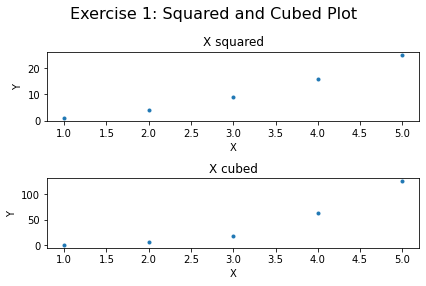

In [393]:
#Graph both plots as subplots
fig, ax = plt.subplots( nrows=2 )
ax[0].plot( x, y, '.')
ax[1].plot( x2, y2, '.')
fig.suptitle("Exercise 1: Squared and Cubed Plot", fontsize=16)
ax[0].set_title('X squared')
ax[1].set_title('X cubed')
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[1].set_ylabel('Y')
fig.tight_layout(pad=1.0)
plt.show()

# Exercise 1.2 Tidy up the plot of K4 chromosome distributions so that it is easier to understand. 

In [621]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [622]:
#Name of columns
bed_columns = ("chr","start","end")
bed_columns

('chr', 'start', 'end')

In [623]:
#Read file
df_k4 = pd.read_table("/Users/cmdb/qbb2020/data/K4me3.bed", names=bed_columns)
df_k4 

,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
...,...,...,...
3825,3R,565835,566082
3826,2L,10439373,10442085
3827,3R,4477321,4479529
3828,3L,711347,711871


In [624]:
#Sort values by type of chromosome, analyse only the chromosome column and count the number of times the chromosome appears
df_k4 = df_k4.sort_values(by="chr")
df_k4 = df_k4.loc[:,"chr"]
df_k4 = df_k4.value_counts()
df_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

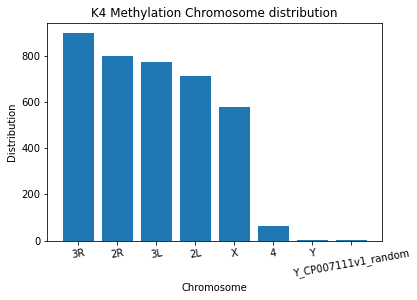

In [625]:
#Graph the data as a bar graph
fig, ax = plt.subplots()
ax.bar(df_k4.index,df_k4) #x=df_k4.index y=df_k4
ax.set_title('K4 Methylation Chromosome distribution')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Distribution')
plt.xticks(rotation=10) #Rotates the axis labels
plt.show()

# Exercise 1.3 Plot K4, K9, and K27 chromosome distributions on the same plot as subplots.

In [626]:
bed_columns = ("chr","start","end")

In [627]:
df_k4 = pd.read_table("/Users/cmdb/qbb2020/data/K4me3.bed", names=bed_columns)
df_k9 = pd.read_table("/Users/cmdb/qbb2020/data/K9me3.bed", names=bed_columns)
df_k27 = pd.read_table("/Users/cmdb/qbb2020/data/K27me3.bed", names=bed_columns)

In [628]:
df_k4 = df_k4.sort_values(by="chr").loc[:,"chr"].value_counts()
df_k9 = df_k9.sort_values(by="chr").loc[:,"chr"].value_counts()
df_k27 = df_k27.sort_values(by="chr").loc[:,"chr"].value_counts()

In [629]:
import matplotlib.gridspec as gridspec #Allows us to change the size of our graphs

<BarContainer object of 7 artists>

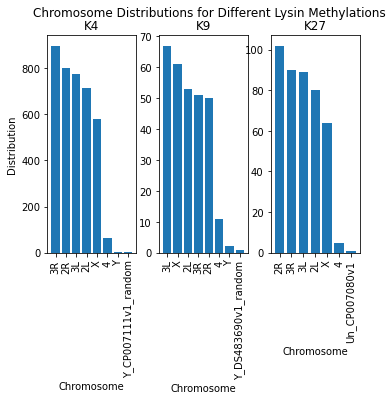

In [630]:
fig = plt.figure(1) #will make a single figure that can then be subdivided 
fig.suptitle("Chromosome Distributions for Different Lysin Methylations", fontsize=12) #Title
gridspec.GridSpec(2,150) #make grid of 2 rows and 150 columns
plt.subplot2grid((2,150), (0,0), colspan=40, rowspan=2) #make subplot for K4 that starts at 0,0 and has a length of 40
plt.title('K4')
plt.xlabel('Chromosome')
plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.bar(df_k4.index,df_k4) #Data goes last
plt.subplot2grid((2,150), (0,50), colspan=40, rowspan=2)  #make subplot for K9 that starts at column 50 and has a length of 40
plt.title('K9')
plt.xlabel('Chromosome')
plt.xticks(rotation=90)
plt.bar(df_k9.index,df_k9)
plt.subplot2grid((2,150), (0,100), colspan=40, rowspan=2) #make subplot for K27 that starts at column 100 and has a length of 40
plt.title('K27')
plt.xlabel('Chromosome')
plt.xticks(rotation=90)
plt.bar(df_k27.index,df_k27)

# Exercise 1.4 Plot K4, K9, and K27 width distributions on the same plot as subplots.



In [643]:
bed_columns = ("chr","start","end")

In [644]:
df_k4 = pd.read_table("/Users/cmdb/qbb2020/data/K4me3.bed", names=bed_columns)
df_k9 = pd.read_table("/Users/cmdb/qbb2020/data/K9me3.bed", names=bed_columns)
df_k27 = pd.read_table("/Users/cmdb/qbb2020/data/K27me3.bed", names=bed_columns)

In [645]:
df_k4.loc[ : , "width"] = df_k4.loc[ : , "end"] - df_k4.loc[ : , "start"] #How to calculate width of methylation
df_k9.loc[ : , "width"] = df_k9.loc[ : , "end"] - df_k9.loc[ : , "start"]
df_k27.loc[ : , "width"] = df_k4.loc[ : , "end"] - df_k27.loc[ : , "start"]

In [640]:
df_k4 = df_k4[['chr', 'width']].sort_values(by="chr")
df_k9 = df_k9[['chr', 'width']].sort_values(by="chr")
df_k27 = df_k27[['chr', 'width']].sort_values(by="chr")

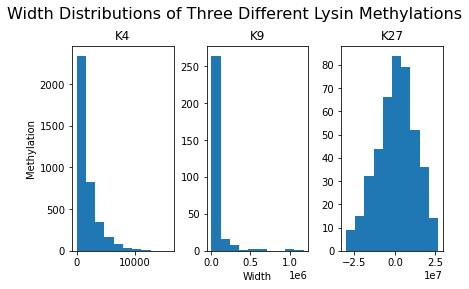

In [649]:
fig, ax = plt.subplots(1,3)
ax[0].hist(df_k4.loc[:,"width"])
ax[1].hist(df_k9.loc[:,"width"])
ax[2].hist(df_k27.loc[:,"width"])
fig.suptitle("Width Distributions of Three Different Lysin Methylations", fontsize=16)
ax[0].set_title('K4')
ax[1].set_title('K9')
ax[2].set_title('K27')
ax[1].set_xlabel('Width')
ax[0].set_ylabel('Methylation')
fig.tight_layout(pad=0.7)
plt.show()